In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.signal import butter, lfilter

In [45]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def data_fft(data,Fs=26):
    Fs = 26;  # sampling rate
    Ts = 1.0/Fs; # sampling interval
    n = len(data) # length of the signal
    k = np.arange(n)
    T = round(n/Fs)
    frq = k/T # two sides frequency range
    frq = frq[range(round(n/2))] # one side frequency range
    t = np.arange(0,n*Ts,Ts)
    Y = np.fft.fft(data)/n # fft computing and normalization
    Y = Y[range(round(n/2))]
    return frq, abs(Y)

def data_process(data,lowcut=3, highcut=5, fs=26,order=5):
    data = butter_bandpass_filter(data, lowcut, highcut, fs, order)
    x, y = data_fft(data,fs)
    return x, y
    

## Import the data

In [20]:
kitti_data = pd.read_csv("/home/brenda/Dropbox/Hackathon/RealData/Kittis wearable 06-01017/kitti.csv")
kitti_data=kitti_data.drop('Unnamed: 0', 1)
lars_data = pd.read_csv("/home/brenda/Dropbox/Hackathon/RealData/Kittis wearable 06-01017/lars.csv")
lars_data=lars_data.drop('Unnamed: 0', 1)

In [21]:
kitti_data.columns=['acc_X','acc_Y','acc_Z','gyro_X','gyro_Y','gyro_Z','heading']
lars_data.columns=['acc_X','acc_Y','acc_Z','gyro_X','gyro_Y','gyro_Z','heading']

In [23]:
lars_data.head()

,acc_X,acc_Y,acc_Z,gyro_X,gyro_Y,gyro_Z,heading
0,-0.51,-0.80,0.58,40.76,-21.50,22.28,49.40
1,-0.18,-0.17,0.47,245.89,-8.29,-80.31,47.43
2,-0.42,-0.26,0.54,62.48,-64.08,-38.30,47.43
3,-0.40,-0.31,0.82,39.11,-14.23,12.60,47.43
4,-0.22,-0.33,0.89,36.77,-29.61,12.40,46.08


In [34]:
kitti_gyro_X = kitti_data['gyro_X'].values
kitti_gyro_Y = kitti_data['gyro_Y'].values
kitti_gyro_Z = kitti_data['gyro_Z'].values

In [35]:
lars_gyro_X = lars_data['gyro_X'].values
lars_gyro_Y = lars_data['gyro_Y'].values
lars_gyro_Z = lars_data['gyro_Z'].values

In [36]:
lars_gyro_X_bandpass = butter_bandpass_filter(lars_gyro_X,3,8,26)

In [ ]:
data_process 

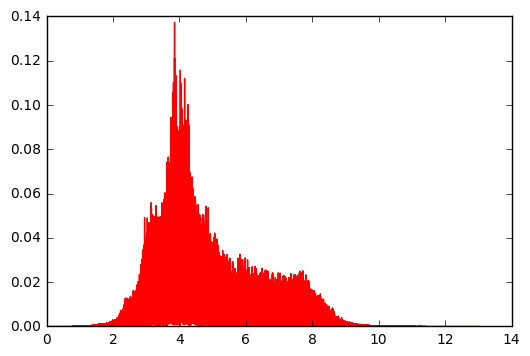

In [42]:
x, y =data_fft(lars_gyro_X_bandpass)
plt.plot(x,y,'red')
plt.show()

In [49]:
x, y = data_process(lars_gyro_Z)
plt.plot(x,y,'red')
plt.show()

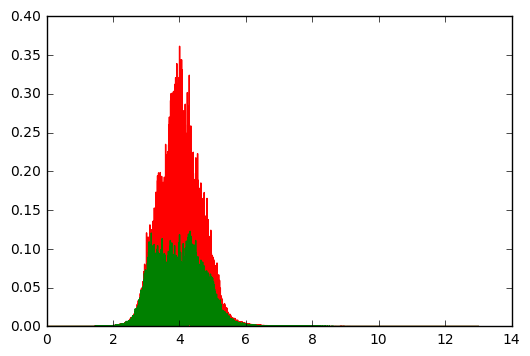

In [57]:
x1, y1 = data_process(lars_gyro_Y)
x2, y2 = data_process(kitti_gyro_Y)
plt.plot(x1,y1,'red')
plt.plot(x2,y2,'green')
plt.show()